In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('output_file.xlsx',index_col=0)

In [2]:
%matplotlib inline

In [15]:
print(df.shape)
print(df.describe())

(315, 57)
           S. No.  10th Percentage   12th Percentange  UG - CGPA (out of 10)   \
count  315.000000        315.000000        315.000000              315.000000   
mean   158.000000         28.780578         27.738477               69.996381   
std     91.076891         38.711050         36.735376               11.868543   
min      1.000000          0.000000          0.000000                0.000000   
25%     79.500000          0.000000          0.000000               65.000000   
50%    158.000000          0.000000          0.000000               69.000000   
75%    236.500000         74.800000         69.780000               77.950000   
max    315.000000        100.000000         98.700000              100.000000   

       GPA (Out of 4)  PG - CGPA or %   AcadScore    UniScore       noopt  
count      315.000000      315.000000  315.000000  315.000000  315.000000  
mean        70.359365       14.463683  211.338483   84.460063    0.660317  
std         12.222393       29.3

In [4]:
df.columns

Index(['S. No.', 'Candidate Name', 'Counselor Name',
       'Block Amount Received Date', 'Univ. Pitched',
       'Candidate Preferred College #1', 'Candidate Preferred College #2',
       '10th Percentage ', '12th Percentange', 'UG - CGPA (out of 10) ',
       'GPA (Out of 4)', 'PG - CGPA or %', 'Work Exp.', 'Highest Education',
       'Designation - Company Name ', 'Candidate Application Status',
       'Candidate Loan Status', 'KYC & Acad Documents Received',
       'Tech Exam Scores', 'Coding Test Score', 'English Exam Scores',
       'English Interview Score (15)', 'Tech. interview Score (10)',
       'Application Type', 'Intake Status', 'U1Choice of School #1',
       'U1Choice of Program #1', 'U1Passport #1', 'U1Resume #1', 'U1Degree #1',
       'U1Transcript #1', 'U1Application Status #1', 'U1Offer Letter #1',
       'U2Choice of School #2', 'U2Choice of Program #2',
       'U2Application Status #2', 'U2Offer Letter #2', 'U2Deposit #2',
       'U3Choice of School #3', 'U3Choice

Popularly Chosen Schools


Number of available choices :  24 



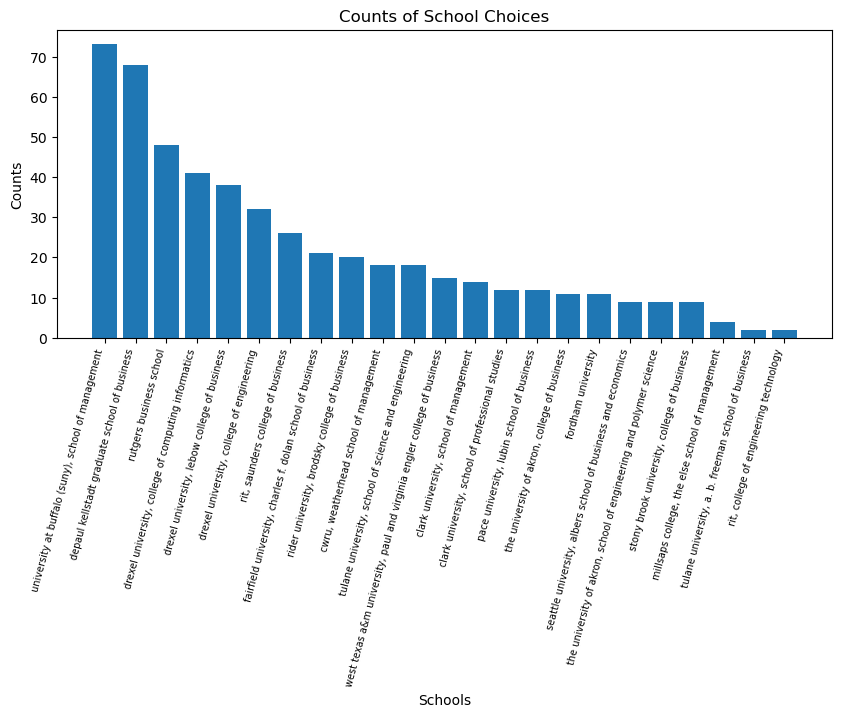

In [38]:

checkcol = ['U1Choice of School #1', 'U2Choice of School #2', 'U3Choice of School #3']

unis = pd.concat([df[col] for col in checkcol])

uniqueuni = unis.unique()

print("Number of available choices : ",len(uniqueuni),'\n')

uni_val_counts = unis.value_counts()

value_to_exclude = 'No Choice'
filterd_uni_val_counts = uni_val_counts[uni_val_counts.index != value_to_exclude]

plt.figure(figsize=(10, 4))

# truncated_labels = [label[:40] for label in filterd_uni_val_counts.index]
# plt.bar(truncated_labels, filterd_uni_val_counts)

plt.bar(filterd_uni_val_counts.index,filterd_uni_val_counts)

plt.xlabel('Schools')
plt.ylabel('Counts')
plt.title('Counts of School Choices')
plt.xticks(rotation=75,fontsize = 7,ha='right')
plt.show()


In [12]:
df['UniScore'].quantile(0.75)
df['UniScore'].quantile(0.25)
df['UniScore'].max()
df['UniScore'].mean()

84.4600634920635

Make two new temporary dataframes which only contains students who received at least one offer letter or didnt

In [20]:
select_stds_df = df[df['noopt'] == 1]
not_select_stds_df = df[df['noopt'] == 0]

select_stds_df.to_excel('selectedStudents.xlsx')
not_select_stds_df.to_excel('notSelectedStudents.xlsx')

# print(select_stds_df.shape)
# print(not_select_stds_df.shape)

print("No of students who dont receive any offer letters : ",len(not_select_stds_df))
print("No of students who received a offer letters : ",len(select_stds_df))

No of students who dont receive any offer letters :  107
No of students who received a offer letters :  208


In [31]:
print("Average of unselected students : ",not_select_stds_df['UniScore'].mean())
print("Average of selected students : ",select_stds_df['UniScore'].mean())

Average of unselected students :  78.35785046728971
Average of selected students :  87.59918269230769


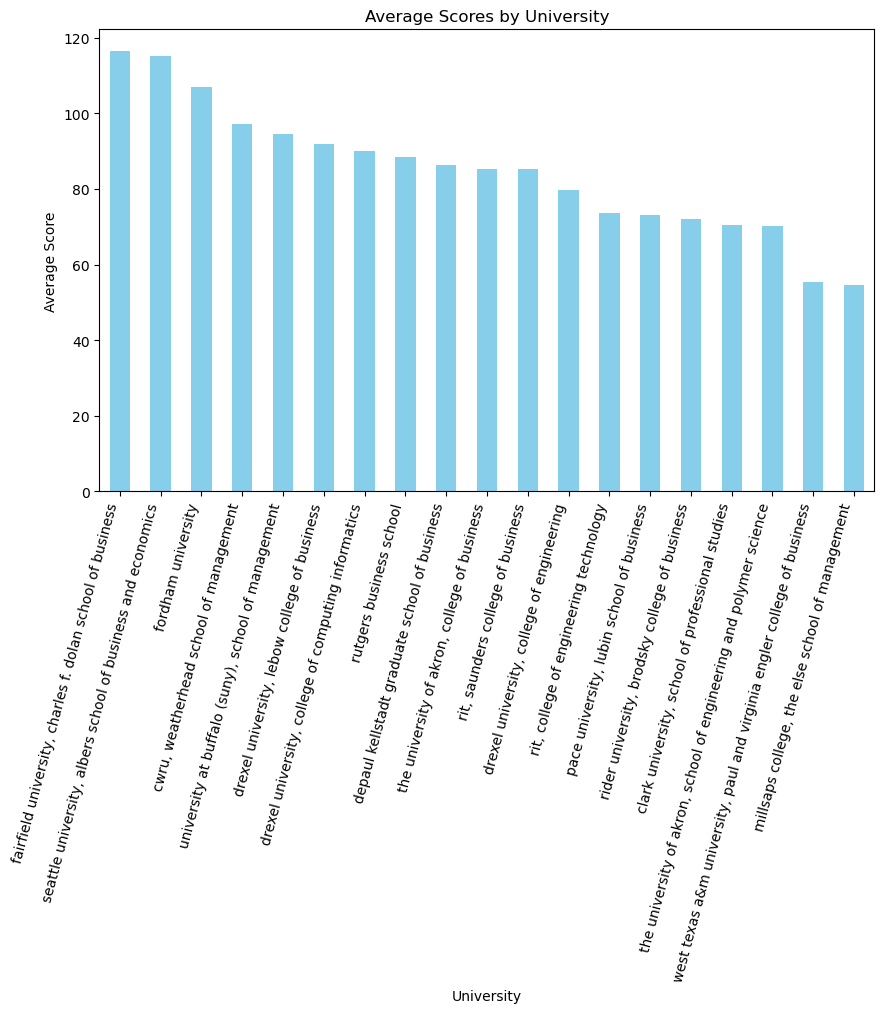

In [35]:
average_scores = select_stds_df.groupby('prefopt')['UniScore'].mean()

average_scores = average_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar', color='skyblue')
plt.xlabel('University')
plt.ylabel('Average Score')
plt.title('Average Scores by University')
plt.xticks(rotation=75, ha='right')
plt.show()